In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dataset import *
from save_load import *
from NN_library.PINN.PINN import *
from NN_library.PINN.train_PINN import *
%load_ext autoreload
%autoreload 2

Using device: cuda


In [6]:
data = dataset(2**12, [0, 2*np.pi], [0, 2*np.pi])
loaders = get_loaders(data, 64)

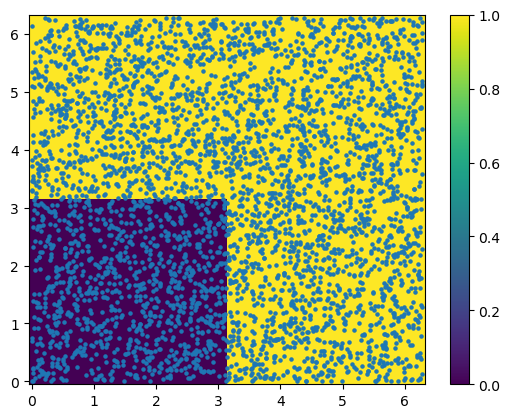

In [7]:
L = 2*np.pi
N = 64 # number of nodes in each direction including the border
H = torch.tensor([1, 0], device=dev).view(1, 2) # macrogradient
x = np.linspace(0, L, N, endpoint=True)
y = np.linspace(0, L, N, endpoint=True)

XY = np.meshgrid(x, y)
def a_function(x,y):
    a = np.where((x<np.pi)&(y<np.pi), 0.1, 1)
    return a
def A(x):
    a = torch.where((x[:,0]<np.pi)&(x[:,1]<np.pi), 0.1, 1).view(-1,1,1)
    I = torch.eye(2, device=dev).repeat(x.shape[0], 1, 1)
    A = a * I
    return A
Z = a_function(XY[0].flatten(),XY[1].flatten())
plt.pcolormesh(XY[0], XY[1], Z.reshape(N, N))
plt.scatter(data[:,0], data[:,1], s = 5)
plt.colorbar()

In [8]:
args = {'lr' : 0.00001, 'epochs' : 200, 'dev' : dev, 'name' : 'NN_library/PINN/PINN'}

In [9]:
net = PINN(n_periodic=10, n_hidden=10, n_layers=3, period_len=L)

In [10]:
total_params = sum(p.numel() for p in net.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 631


In [ ]:
net = load_network(net, args['name']+'', args)

In [13]:
losses_train, losses_val = train(net, loaders, args, A, H)

KeyboardInterrupt: 

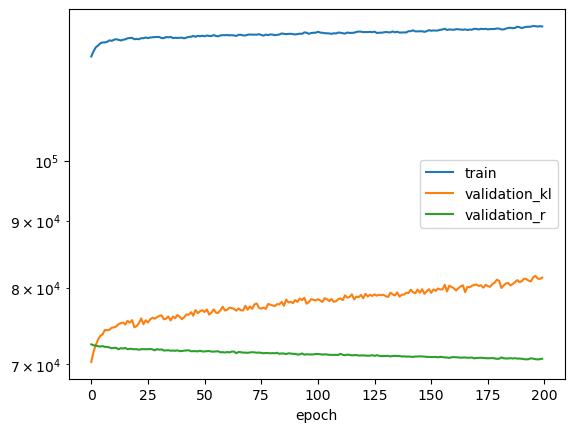

In [11]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.yscale('log')

In [24]:
train_data = next(iter(loaders['train']))[0].to(args['dev'])

In [8]:
vae = vae.to(args['dev'])

In [9]:
y = vae(train_data)

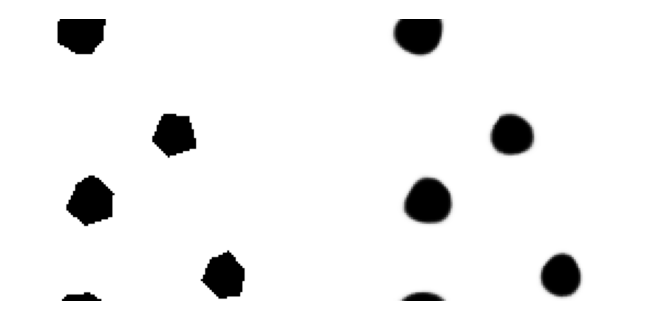

In [19]:
I = 2
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(4, 2), dpi=200)
axs.flat[0].imshow(train_data[I][0].detach().cpu().numpy(), cmap='Greys')
axs.flat[1].imshow(y[I][0].detach().cpu().numpy(), cmap='Greys')
axs.flat[0].set_axis_off()
axs.flat[1].set_axis_off()